<a href="https://colab.research.google.com/github/MudSnail/Land_Cover_Classification/blob/main/Model_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Increase RAM size 
a = []
while(1):
  a.append('1')

In [1]:
#Mount to Drive
from google.colab import drive
drive.mount('/content/drive')

#Import Pandas and Numpy
import pandas as pd
import numpy as np

#Import Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#misc
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Load Data
data = pd.read_csv('/content/drive/MyDrive/simcoe_land_class_data.csv')
data.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Class
0,0.1203,0.0267,0.0610,0.0693,0.0135,0.0227,0.2069,0.2206,0.2447,0.2106,0.1763,0.0320,15
1,0.1043,0.0275,0.0519,0.0677,0.0113,0.0190,0.1623,0.1854,0.2260,0.1844,0.1367,0.0306,15
2,0.0952,0.0209,0.0457,0.0541,0.0095,0.0179,0.1514,0.1701,0.2182,0.1631,0.1264,0.0260,15
3,0.0989,0.0215,0.0490,0.0589,0.0096,0.0215,0.1587,0.1803,0.2283,0.1727,0.1341,0.0267,15
4,0.1221,0.0243,0.0637,0.0633,0.0131,0.0265,0.2276,0.2227,0.2458,0.2257,0.1910,0.0333,17


In [3]:
#Check value counts
data.Class.value_counts()

15    2836714
18     685749
5      607429
17     512418
6      375582
14      92096
1       79933
16      70525
8       55794
10      18760
Name: Class, dtype: int64

In [19]:
# find nills is your dataframe
print(data.isnull().sum())

B1       0
B2       0
B3       0
B4       0
B5       0
B6       0
B7       0
B8       0
B9       0
B10      0
B11      0
B12      0
Class    0
dtype: int64


In [21]:
#SubSample ~100 000 for each class
sample = data.groupby('Class').apply(lambda x: x.sample(n=18000)).reset_index(drop=True)
sample.head(4)

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Class
0,0.0965,0.0199,0.0400,0.0634,0.0142,0.0143,0.2823,0.3088,0.3198,0.3225,0.2343,0.0352,1
1,0.0841,0.0192,0.0348,0.0526,0.0137,0.0157,0.2201,0.2351,0.2626,0.2453,0.1767,0.0295,1
2,0.0973,0.0229,0.0379,0.0613,0.0143,0.0127,0.1984,0.1989,0.2166,0.1819,0.1470,0.0289,1
3,0.0755,0.0156,0.0349,0.0378,0.0110,0.0234,0.1422,0.1467,0.1938,0.1425,0.1144,0.0232,1


In [22]:
#Create NDVI column (B8-B4)/(B8+B4)
sample['NDVI'] = (sample.B8-sample.B4)/(sample.B8+sample.B4)
#Create Moisture index (B8A-B11)/(B8A+B11)
sample['Moisture'] = (sample.B12-sample.B10)/(sample.B12+sample.B10)
#Create NDWI (B3-B8)/(B3+B8)
sample['NDWI'] = (sample.B3-sample.B8)/(sample.B3+sample.B8)
#create NDSI (B3-B11)/(B3+B11)
sample['NDSI'] = (sample.B3-sample.B10)/(sample.B3+sample.B10)

In [23]:
#View new dataframe
sample.head()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Class,NDVI,Moisture,NDWI,NDSI
0,0.0965,0.0199,0.0400,0.0634,0.0142,0.0143,0.2823,0.3088,0.3198,0.3225,0.2343,0.0352,1,0.659323,-0.803187,-0.770642,-0.779310
1,0.0841,0.0192,0.0348,0.0526,0.0137,0.0157,0.2201,0.2351,0.2626,0.2453,0.1767,0.0295,1,0.634341,-0.785298,-0.742127,-0.751517
2,0.0973,0.0229,0.0379,0.0613,0.0143,0.0127,0.1984,0.1989,0.2166,0.1819,0.1470,0.0289,1,0.528824,-0.725806,-0.679899,-0.655141
3,0.0755,0.0156,0.0349,0.0378,0.0110,0.0234,0.1422,0.1467,0.1938,0.1425,0.1144,0.0232,1,0.590244,-0.719976,-0.615639,-0.606539
4,0.1017,0.0306,0.0464,0.0777,0.0180,0.0170,0.2252,0.2512,0.2210,0.2635,0.1950,0.0396,1,0.527516,-0.738700,-0.688172,-0.700549


In [24]:
#Ensure that all values are float32
np.where(sample.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [25]:
#Split the Data
y = sample['Class']
X = sample.drop(['Class'], axis = 1)

In [26]:
#Apply standardscaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
#Print data shapes
print(X.shape)
print(y.shape)

(180000, 16)
(180000,)


In [28]:
#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    stratify = y, 
                                                    random_state=42)

In [29]:
#Instantiate Random Fore
rfc = RandomForestClassifier(random_state=42)

#Fit training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
#Predict X_test
y_prediction = rfc.predict(X_test)

#Print measure scores
print(f"Accuracy: {accuracy_score(y_test, y_prediction)}")
print(f"F1 Score: {f1_score(y_test, y_prediction, average='micro')}")
print(f"Precision Score: {precision_score(y_test, y_prediction, average='micro')}")
print(f"Recall Score: {recall_score(y_test, y_prediction, average='micro')}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rfc.predict_proba(X_test),multi_class='ovr', average='macro')}")

#print full classification report
print(classification_report(y_test, y_prediction))

Accuracy: 0.5403333333333333
F1 Score: 0.5403333333333333
Precision Score: 0.5403333333333333
Recall Score: 0.5403333333333333
ROC AUC Score: 0.8846796290580704
              precision    recall  f1-score   support

           1       0.58      0.64      0.61      5400
           5       0.43      0.47      0.45      5400
           6       0.42      0.49      0.46      5400
           8       0.44      0.30      0.36      5400
          10       0.49      0.34      0.40      5400
          14       0.66      0.73      0.70      5400
          15       0.49      0.51      0.50      5400
          16       0.39      0.35      0.37      5400
          17       0.49      0.61      0.54      5400
          18       0.98      0.96      0.97      5400

    accuracy                           0.54     54000
   macro avg       0.54      0.54      0.53     54000
weighted avg       0.54      0.54      0.53     54000



Text(0.5, 1.0, 'RF Accuracy Score: 0.5403333333333333')

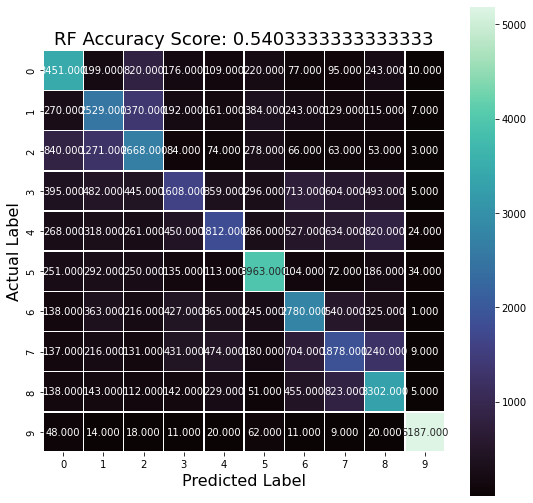

In [31]:
#Create a confusion matrix
matrix = confusion_matrix(y_test, y_prediction)

#Visualize the matrix with Seaborn

#Write title to display accuracy score
score = accuracy_score(y_test, y_prediction)
all_sample_title = 'RF Accuracy Score: {0}'.format(score)

#Set figure shape
plt.figure(figsize=(9,9))

#Use heatmap
p = sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="mako")

#Label the plot
p.set_ylabel('Actual Label', size=16)
p.set_xlabel('Predicted Label', size = 16)
p.set_title(all_sample_title, size = 18)

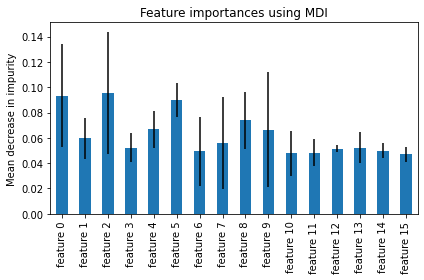

In [33]:
#Find which features were most important
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()